## RQ1: How relevant is the topic?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV files
github_actions_df = pd.read_csv(f'..\RQ1\data\github-actions.csv')
jenkins_df = pd.read_csv(f'..\RQ1\data\jenkins.csv')
gitlab_ci_df = pd.read_csv(f'..\RQ1\data\gitlab-ci.csv')
azure_devops_df = pd.read_csv(f'..\RQ1\data\\azure-devops.csv')
circleci_df = pd.read_csv(f'..\RQ1\data\circleci.csv')
travis_ci_df = pd.read_csv(f'..\RQ1\data\\travis-ci.csv')  

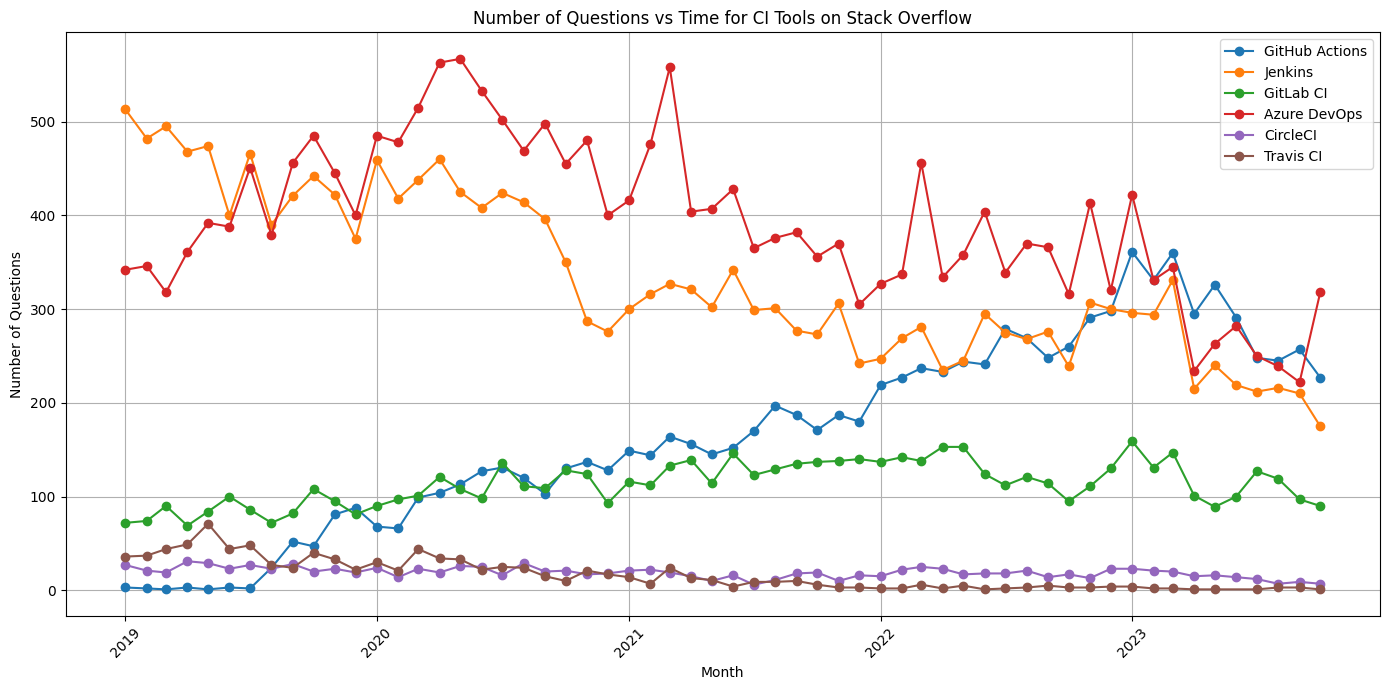

In [3]:

github_actions_df['Month'] = pd.to_datetime(github_actions_df['Month'])
jenkins_df['Month'] = pd.to_datetime(jenkins_df['Month'])
gitlab_ci_df['Month'] = pd.to_datetime(gitlab_ci_df['Month'])
azure_devops_df['Month'] = pd.to_datetime(azure_devops_df['Month'])
circleci_df['Month'] = pd.to_datetime(circleci_df['Month'])
travis_ci_df['Month'] = pd.to_datetime(travis_ci_df['Month'])  

# Plotting
plt.figure(figsize=(14, 7))

# Plot each CI tool's data
plt.plot(github_actions_df['Month'], github_actions_df['NumberOfQuestions'], label='GitHub Actions', marker='o')
plt.plot(jenkins_df['Month'], jenkins_df['NumberOfQuestions'], label='Jenkins', marker='o')
plt.plot(gitlab_ci_df['Month'], gitlab_ci_df['NumberOfQuestions'], label='GitLab CI', marker='o')
plt.plot(azure_devops_df['Month'], azure_devops_df['NumberOfQuestions'], label='Azure DevOps', marker='o')
plt.plot(circleci_df['Month'], circleci_df['NumberOfQuestions'], label='CircleCI', marker='o')
plt.plot(travis_ci_df['Month'], travis_ci_df['NumberOfQuestions'], label='Travis CI', marker='o')  # This is not provided, hence commented out.

# Formatting the plot
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions vs Time for CI Tools on Stack Overflow')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


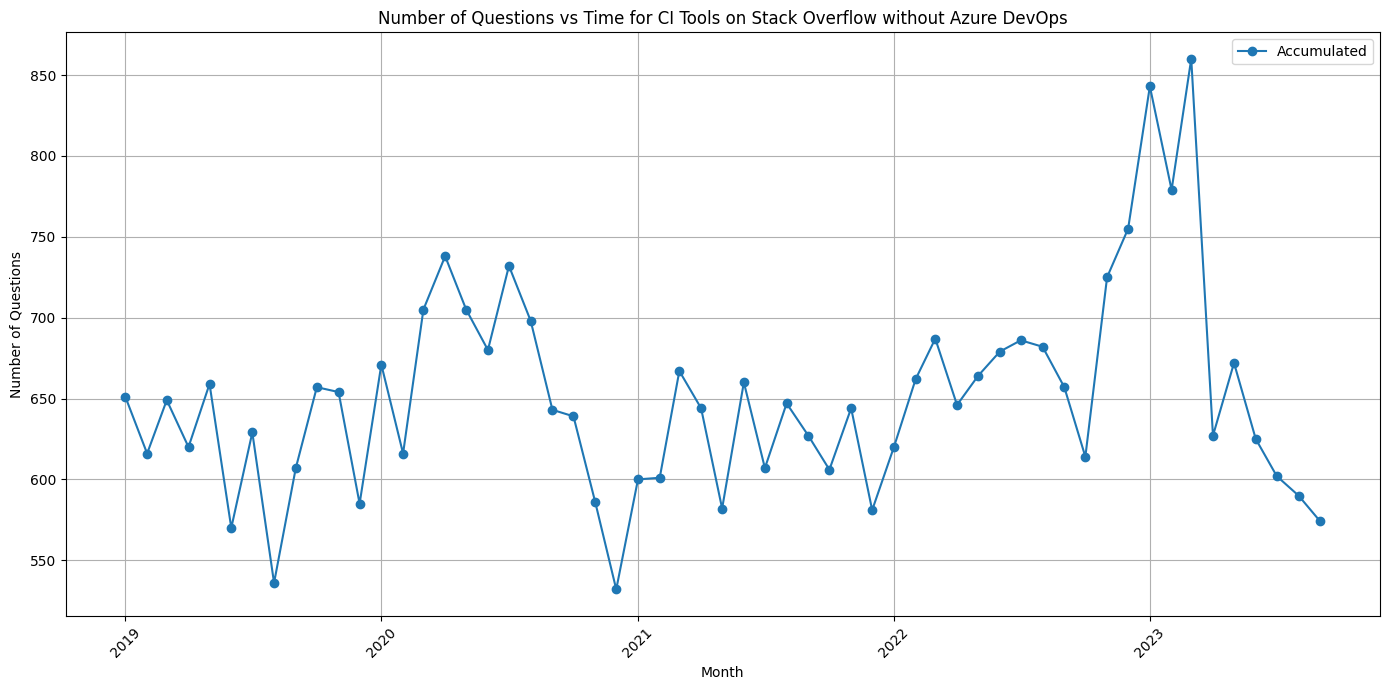

In [4]:
accumulated_df = pd.DataFrame()
accumulated_df['Month'] = github_actions_df['Month']
accumulated_df['NumberOfQuestions'] = github_actions_df['NumberOfQuestions'] + jenkins_df['NumberOfQuestions'] + gitlab_ci_df['NumberOfQuestions'] + azure_devops_df['NumberOfQuestions'] + circleci_df['NumberOfQuestions'] + travis_ci_df['NumberOfQuestions']
accumulated_df['NumberOfQuestions'] = github_actions_df['NumberOfQuestions'] + jenkins_df['NumberOfQuestions'] + gitlab_ci_df['NumberOfQuestions'] + circleci_df['NumberOfQuestions'] + travis_ci_df['NumberOfQuestions']

plt.figure(figsize=(14, 7))
plt.plot(accumulated_df['Month'], accumulated_df['NumberOfQuestions'], label='Accumulated', marker='o')
# Formatting the plot
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions vs Time for CI Tools on Stack Overflow without Azure DevOps')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 

# Show the plot
plt.show()

In [12]:
# Total number of SO posts for each ci tool

print(github_actions_df['NumberOfQuestions'].sum())
print(jenkins_df['NumberOfQuestions'].sum())
print(gitlab_ci_df['NumberOfQuestions'].sum())
print(azure_devops_df['NumberOfQuestions'].sum())
print(circleci_df['NumberOfQuestions'].sum())
print(travis_ci_df['NumberOfQuestions'].sum())

9622
19354
6581
22797
1095
940
